In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df.drop(columns='Id', inplace=True)

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: >

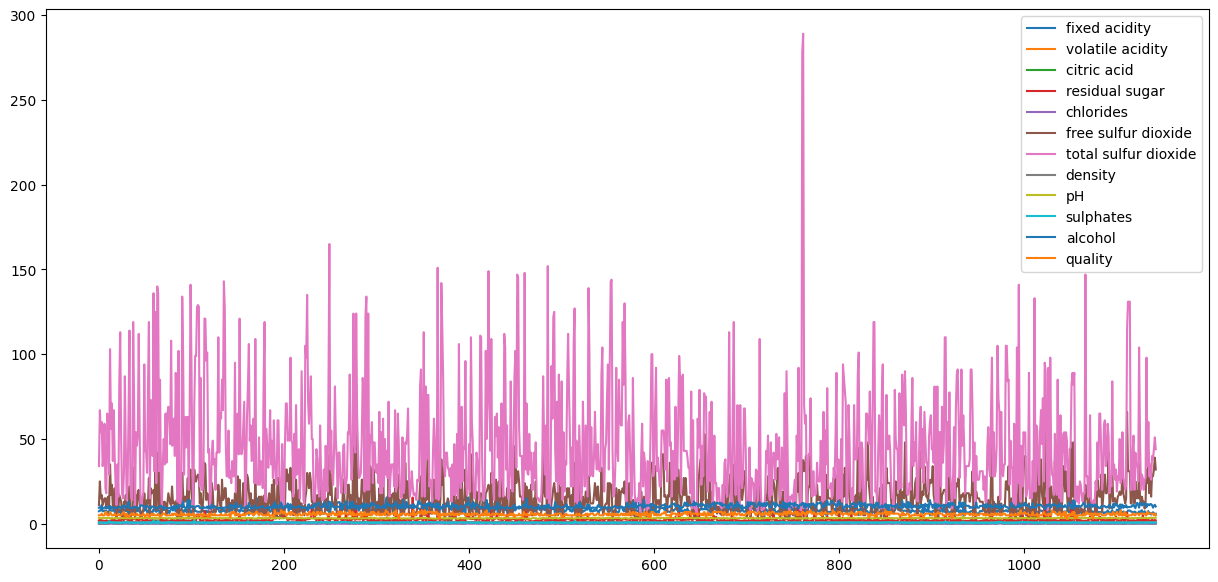

In [10]:
df.plot(figsize=(15,7))

In [11]:
avg = df.groupby('quality').mean()
avg

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<Axes: xlabel='quality'>

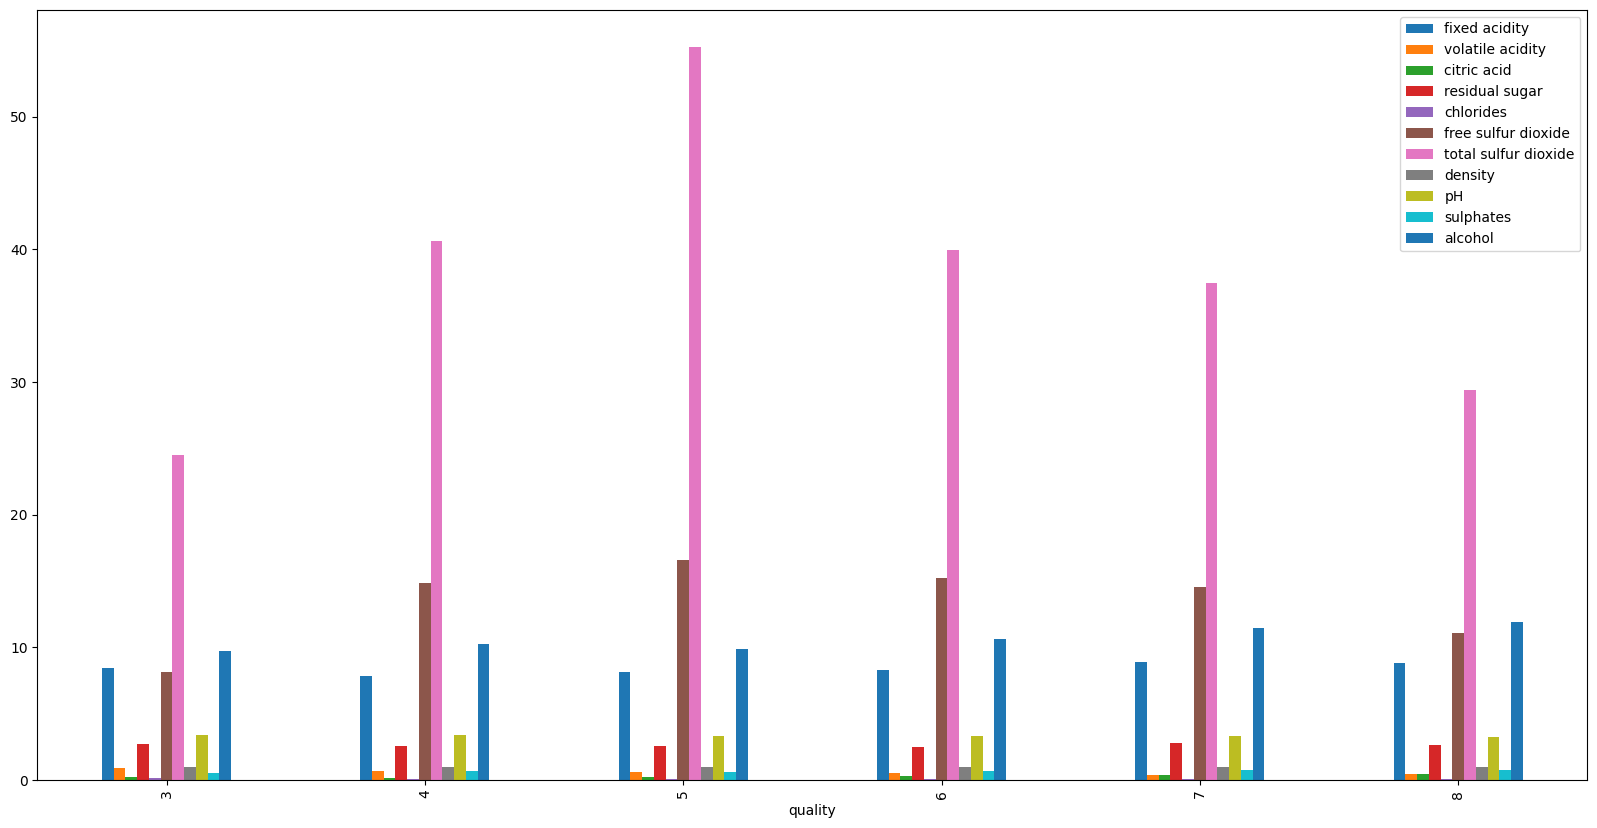

In [12]:
avg.plot(kind="bar", figsize=(20,10))

In [13]:
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, confusion_matrix, accuracy_score

In [15]:
df = df.loc[:, ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol', 'quality']]
df.head()

,total sulfur dioxide,free sulfur dioxide,alcohol,quality
0,34.0,11.0,9.4,5
1,67.0,25.0,9.8,5
2,54.0,15.0,9.8,5
3,60.0,17.0,9.8,6
4,34.0,11.0,9.4,5


In [16]:
df = df.rename(columns={'total sulfur dioxide': 'tsd', 'free sulfur dioxide': 'fsd'})

In [17]:
# test columns to be dropped
test_columns = ['quality', 'alcohol', 'fsd']

X1 = df.drop(columns=test_columns)
y1 = df['alcohol']

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

print("X-Train : ", X_train.shape)
print("X-Test : ", X_test.shape)
print("y-Train : ", y_train.shape)
print("y-test : ", y_test.shape)

X-Train :  (857, 1)
X-Test :  (286, 1)
y-Train :  (857,)
y-test :  (286,)


In [19]:
# Linear Regression
LR_model = LinearRegression()

# fit model
LR_model.fit(X_train, y_train)

y_pred1 = LR_model.predict(X_test)


df_new = pd.DataFrame({'y_test':y_test,
                       'y_pred1':y_pred1
                       })
df_new.head()


,y_test,y_pred1
158,9.500000,10.644471
1081,9.233333,10.317128
291,10.500000,9.965977
538,9.100000,10.513534
367,11.900000,10.620664


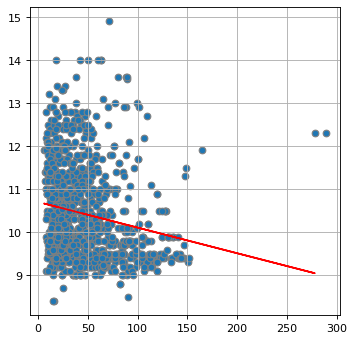

In [20]:
plt.figure(figsize=(5,5), dpi=80)
plt.grid(True)
plt.scatter(df['tsd'],df['alcohol'],edgecolor = 'grey')
plt.plot(X_train, LR_model.predict(X_train), color = 'red')

In [21]:
# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred1))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred1))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred1)) 

 Model Evaluation Linear R : mean absolute error is  0.8612368853916132
 Model Evaluation Linear R : mean squared  error is  1.2108020443301715
 Model Evaluation Linear R : median absolute error is  0.7482316122298354
